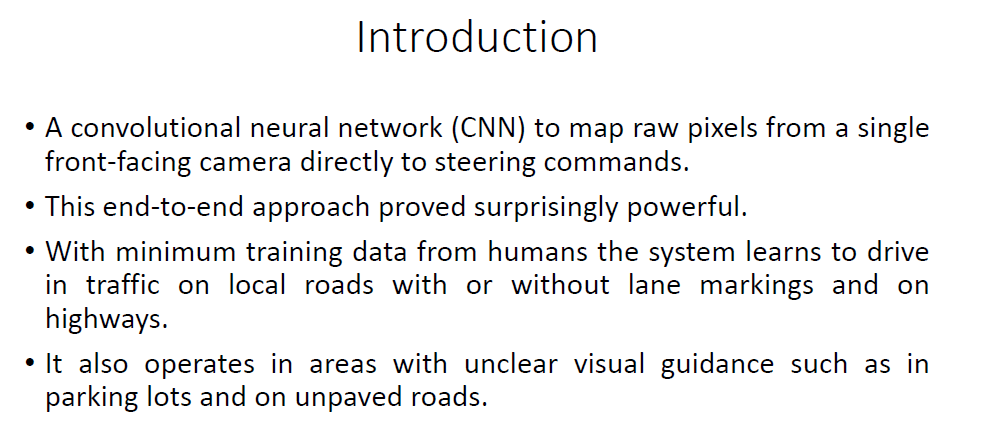

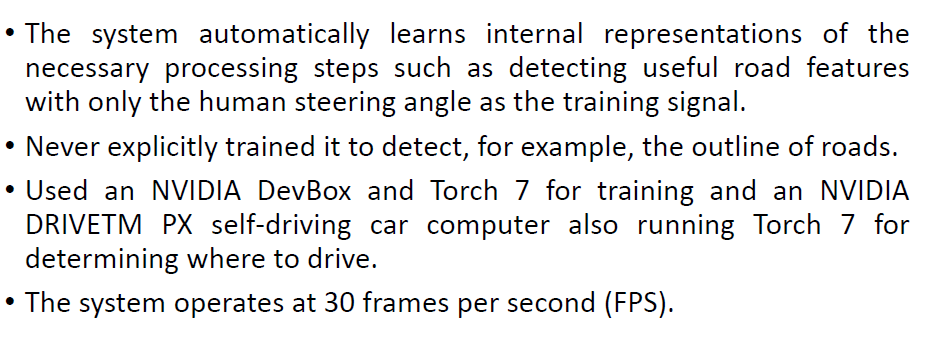

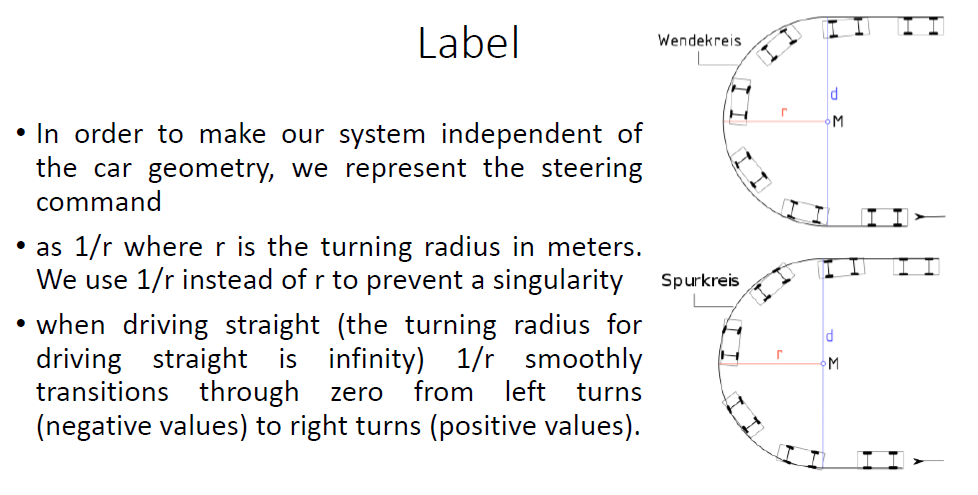

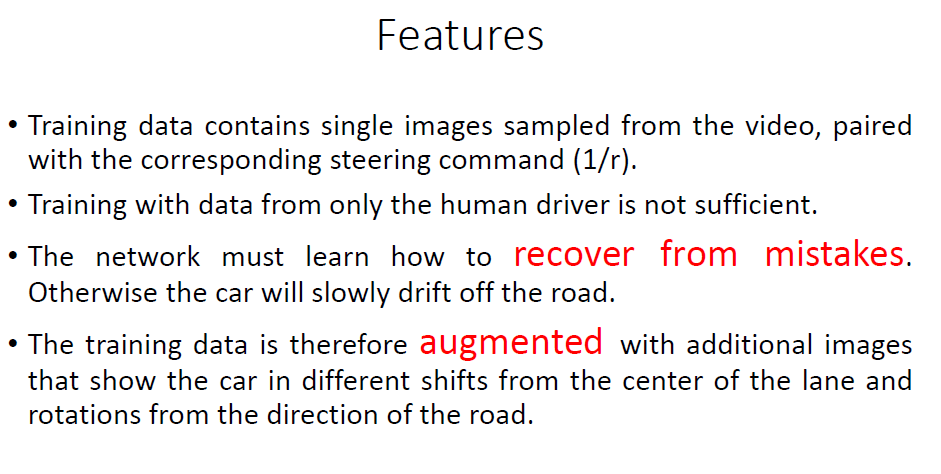

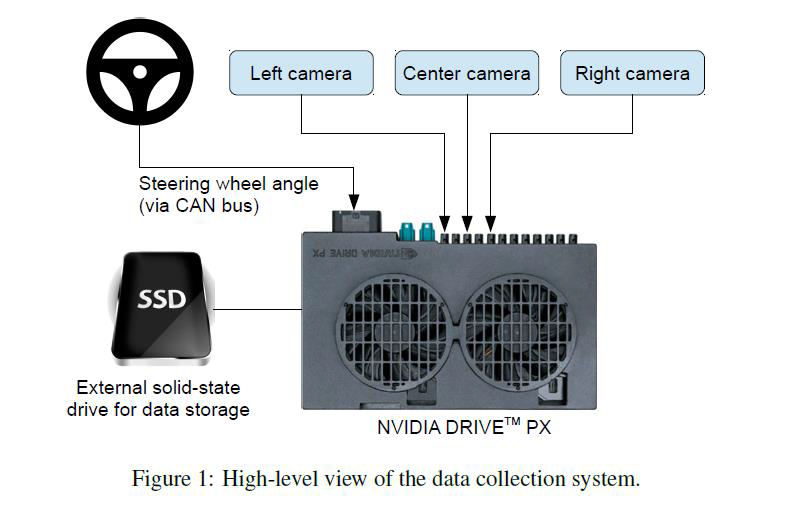

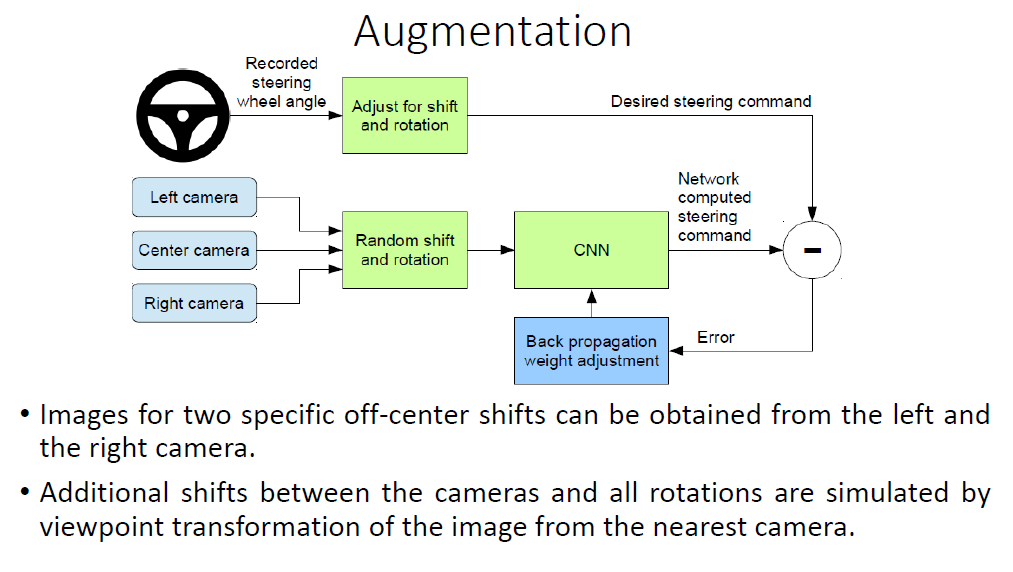

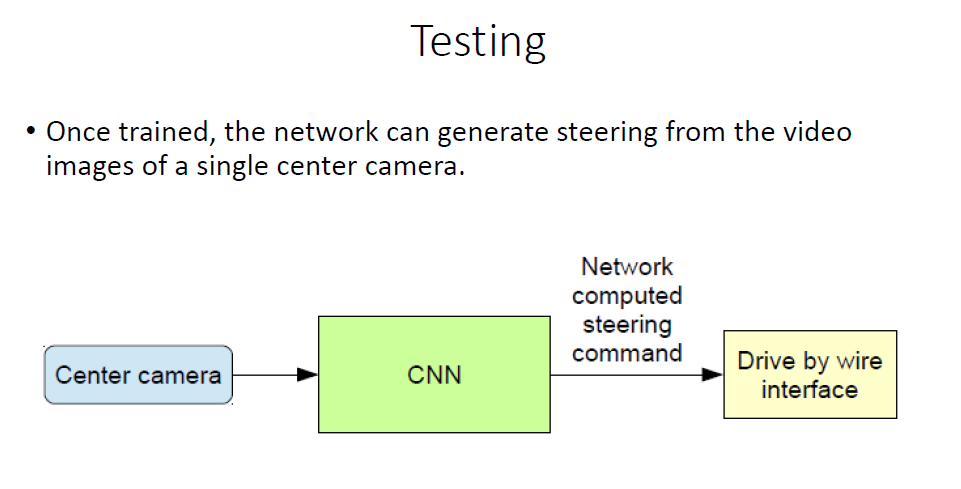

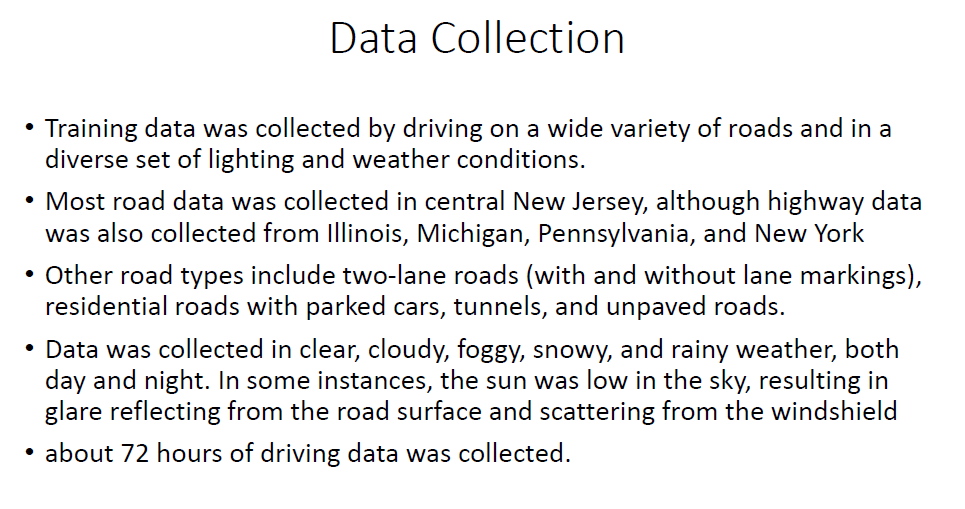

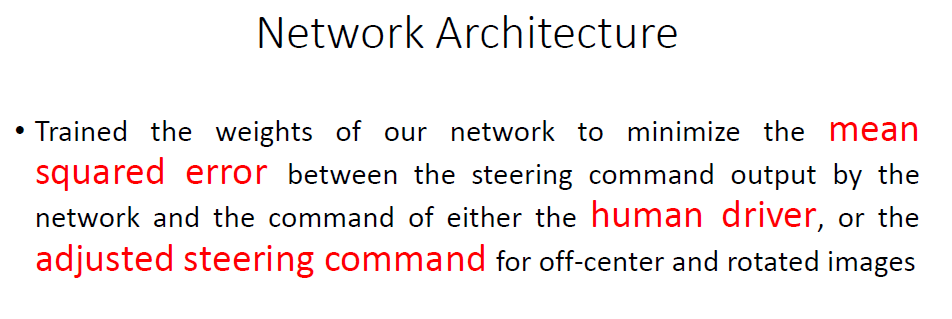

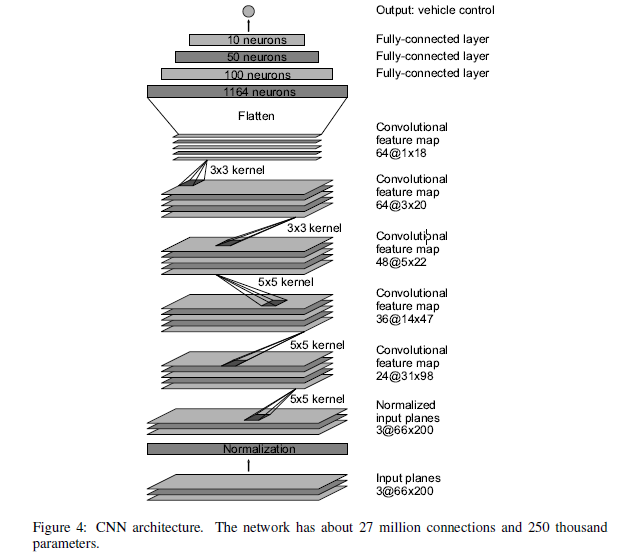

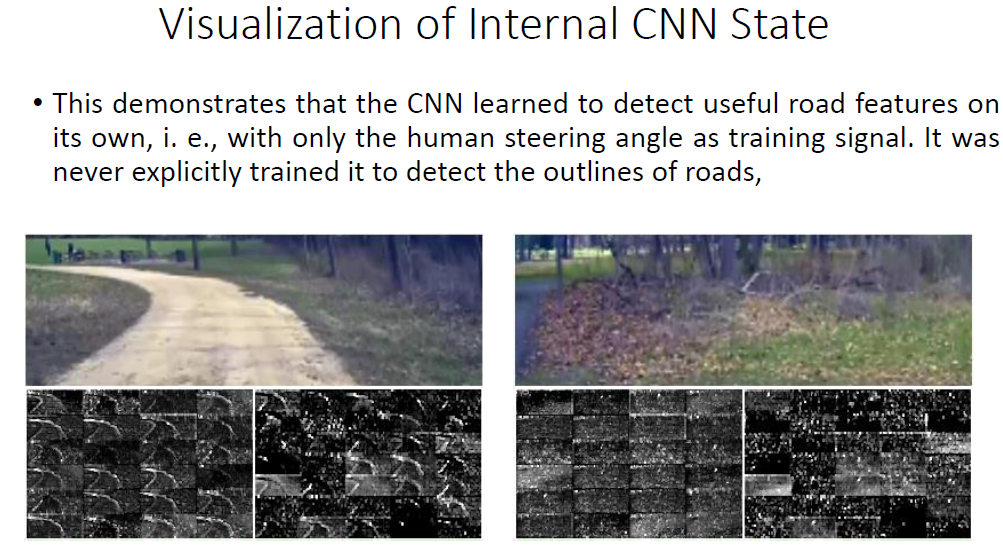

# References

Bojarski, Mariusz& Testa, Davide& Dworakowski, Daniel & Firner, Bernhard & Flepp, Beat & Goyal, Prasoon& Jackel, Larry & Monfort, Mathew & Muller, Urs& Zhang, Jiakai& Zhang, Xin & Zhao, Jake & Zieba, Karol. (2016). End to End Learning for Self-Driving Cars.

# Installing the Environment

1. ```conda create -n self-driving-car```
2. ```conda activate self-driving-car```
3. ```pip install -r requirements.txt```

In [1]:
import os

import csv
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

In [2]:
data_path='data'
label_path='data/driving_log.csv'

In [3]:
import pandas as pd
import numpy as np

dataset=pd.read_csv(label_path)
dataset.head()

,D:\Data_Science\DL_Workshop\Rewatch\Day 06\data\IMG\center_2021_03_17_11_26_15_811.jpg,D:\Data_Science\DL_Workshop\Rewatch\Day 06\data\IMG\left_2021_03_17_11_26_15_811.jpg,D:\Data_Science\DL_Workshop\Rewatch\Day 06\data\IMG\right_2021_03_17_11_26_15_811.jpg,0,0.1,0.2,3.3231
0,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,0.0,0.0,0.0,3.296397
1,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,0.0,0.0,0.0,3.269908
2,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,0.0,0.0,0.0,3.243633
3,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,0.0,0.0,0.0,3.217569
4,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,D:\Data_Science\DL_Workshop\Rewatch\Day 06\dat...,0.0,0.0,0.0,3.191714


In [4]:
dataset=dataset.values
data=dataset[:,0:3]
target=dataset[:,3]

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
def load_image(data_dir, image_file):
    
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))

In [7]:
test_data[100][2]

'D:\\Data_Science\\DL_Workshop\\Rewatch\\Day 06\\data\\IMG\\right_2021_03_17_11_27_16_384.jpg'

-0.15


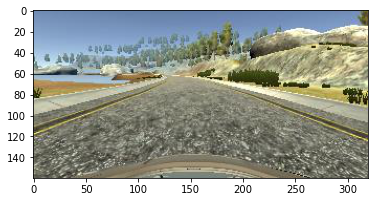

In [8]:
img=load_image(data_path,test_data[0][0])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

In [9]:
print(target.shape)
print(train_target.shape)

(3380,)
(3042,)


-0.15


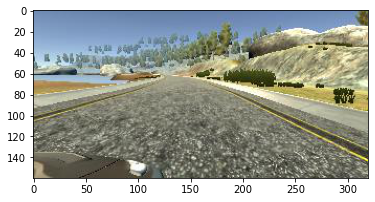

In [10]:
img=load_image(data_path,test_data[0][2])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

# Data Preprocessing

1. Cropping the image to cut off the sky scene and the car front.
2. Resizing the image to (66 * 200), the image size that the model expects.
3. Converting the image to the YUV color space.
4. Normalizing the images (by dividing image data by 127.5 and subtracting 1.0). As stated in the Model Architecture section, this is to avoid saturation and make gradients work better).

In [11]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [12]:
def preprocess(img):

    # Cropping the image
    img = img[60:-25, :, :]
    # Resizing the image
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)
    # Converting the image to YUV
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

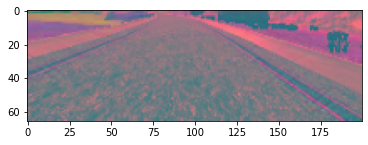

In [13]:
preprocessed_img=preprocess(img)
plt.imshow(preprocessed_img)

In [14]:
preprocessed_img.shape

(66, 200, 3)

In [15]:
def random_adjust(data_dir, center, left, right, steering_angle):

    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle

-0.35


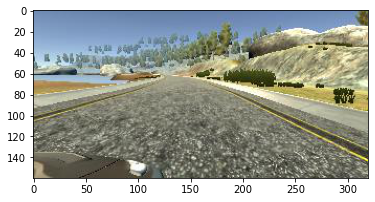

In [16]:
adjusted_img,adjusted_str=random_adjust(data_path,test_data[0][0],test_data[0][1],test_data[0][2],test_target[0])
plt.imshow(adjusted_img)
print(adjusted_str)

In [17]:
def display(image, angle, label):
    plt.imshow(image)
    plt.xlabel("Steering angle: {:.5f}".format(angle))
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [18]:
def random_flip(image, steering_angle):

    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle

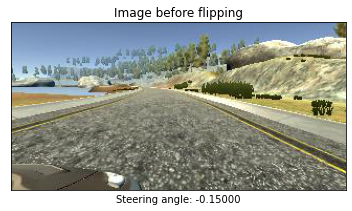

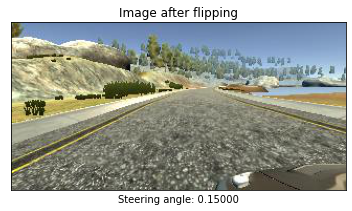

In [19]:
label = "Image before flipping"
display(img, steering_angle, label)

flipped_img,fliiped_str = random_flip(img, steering_angle)
label = "Image after flipping"
display(flipped_img, fliiped_str, label)

In [20]:
def random_shift(image, steering_angle, range_x, range_y):

    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle

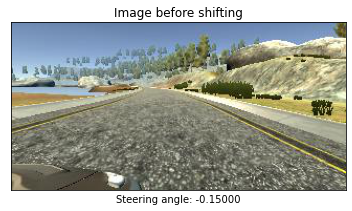

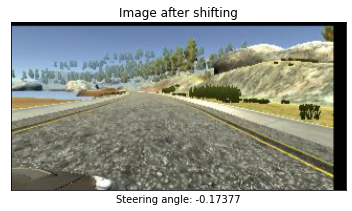

In [21]:
label = "Image before shifting"
display(img, steering_angle, label)

shifted_img,shifted_str = random_shift(img, steering_angle,100, 10)
label = "Image after shifting"
display(shifted_img, shifted_str, label)

In [22]:
def random_shadow(image):

    bright_factor = 0.3
    x = random.randint(0, image.shape[1])
    y = random.randint(0, image.shape[0])
    width = random.randint(image.shape[1], image.shape[1])
    if(x + width > image.shape[1]):
        x = image.shape[1] - x
    height = random.randint(image.shape[0], image.shape[0])
    if(y + height > image.shape[0]):
        y = image.shape[0] - y
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[y:y+height,x:x+width,2] = image[y:y+height,x:x+width,2]*bright_factor
    return cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

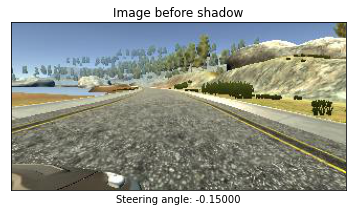

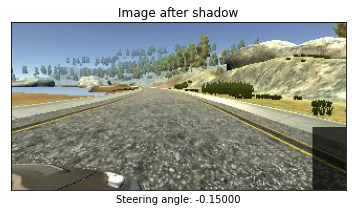

In [23]:
label = "Image before shadow"
display(img, steering_angle, label)

shadow_img = random_shadow(img)
label = "Image after shadow"
display(shadow_img, steering_angle, label)

In [24]:
def random_brightness(image):

    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

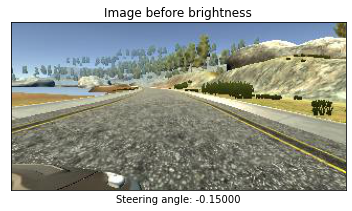

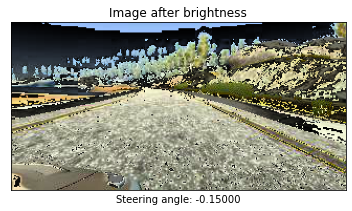

In [25]:
label = "Image before brightness"
display(img, steering_angle, label)

brightness_img = random_brightness(img)
label = "Image after brightness"
display(brightness_img, steering_angle, label)

# Augmentation Function

In [26]:
def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):

    image, steering_angle = random_adjust(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_shift(image, steering_angle, range_x, range_y)
    image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle

# Nvidia CNN

In [27]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

def NVIDIA_model():
    
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    model.summary()
    
    model.compile(loss='mse', optimizer=Adam(lr=1.0e-4))
    
    return model

In [28]:
batch_size = 40
samples_per_epoch = 20000
nb_epoch = 10

In [29]:
def batcher(data_dir, image_paths, steering_angles, batch_size, training_flag):

    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            if training_flag and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        yield images, steers

In [30]:
def train_model(model, X_train, X_valid, y_train, y_valid):
    
    checkpoint = ModelCheckpoint('models/model-{val_loss:03f}.h5',monitor='val_loss',save_best_only=True,mode='auto')
    
    model.fit_generator(batcher(data_path, X_train, y_train, batch_size, True),samples_per_epoch,nb_epoch,
                        validation_data=batcher(data_path, X_valid, y_valid, batch_size, False),validation_steps=len(X_valid)//batch_size,callbacks=[checkpoint])

In [31]:
model = NVIDIA_model()
train_model(model,train_data,test_data,train_target,test_target)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout (Dropout)            (None, 1, 18, 64)         0

D:\Anaconda_Environment\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
   56/20000 [..............................] - ETA: 1:49:40 - loss: 0.0698

KeyboardInterrupt: 